# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
import pandas as pd

student_data = pd.DataFrame({'StudenID':list(range(1,11)),
                             'Age': [17,51,27,21,36,48,19,26,54,30],
                             'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

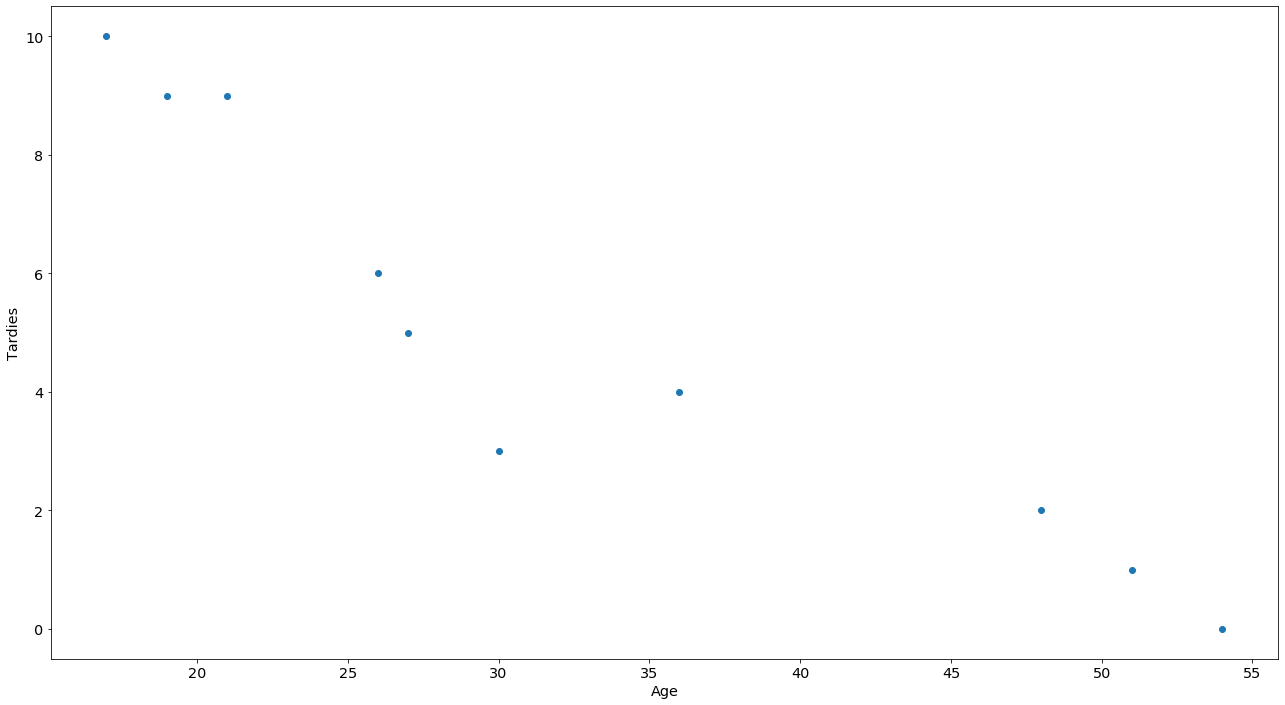

In [25]:
# Your code here.
import matplotlib.pyplot as plt 
%matplotlib inline

params = {'legend.fontsize': 20,
          'figure.figsize': (22, 12),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.scatter(student_data.Age, student_data.Tardies)
plt.xlabel('Age')
plt.ylabel('Tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [26]:
# Your response here. 
# The data shows a negative linear relationship between both varibles.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [35]:
student_data[['Age', 'Tardies']].cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [36]:
student_data[['Age', 'Tardies']].corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [37]:
# Both covariance and correlation have negative values, however if we cosider absolut values, the covariance has a high value
# which indicate a strong dependency between the variables and the correlation has a value very close to one, indicating a
# good fit.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [41]:
# Your response here.
import statsmodels.api as sm

X = sm.add_constant(student_data.Age)
Y = student_data.Tardies

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           5.57e-05
Time:                        10:28:00   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\XHOAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [42]:
# The outcome variable will be Tardies and the regresion type is linear.

Plot your regression model on your scatter plot.

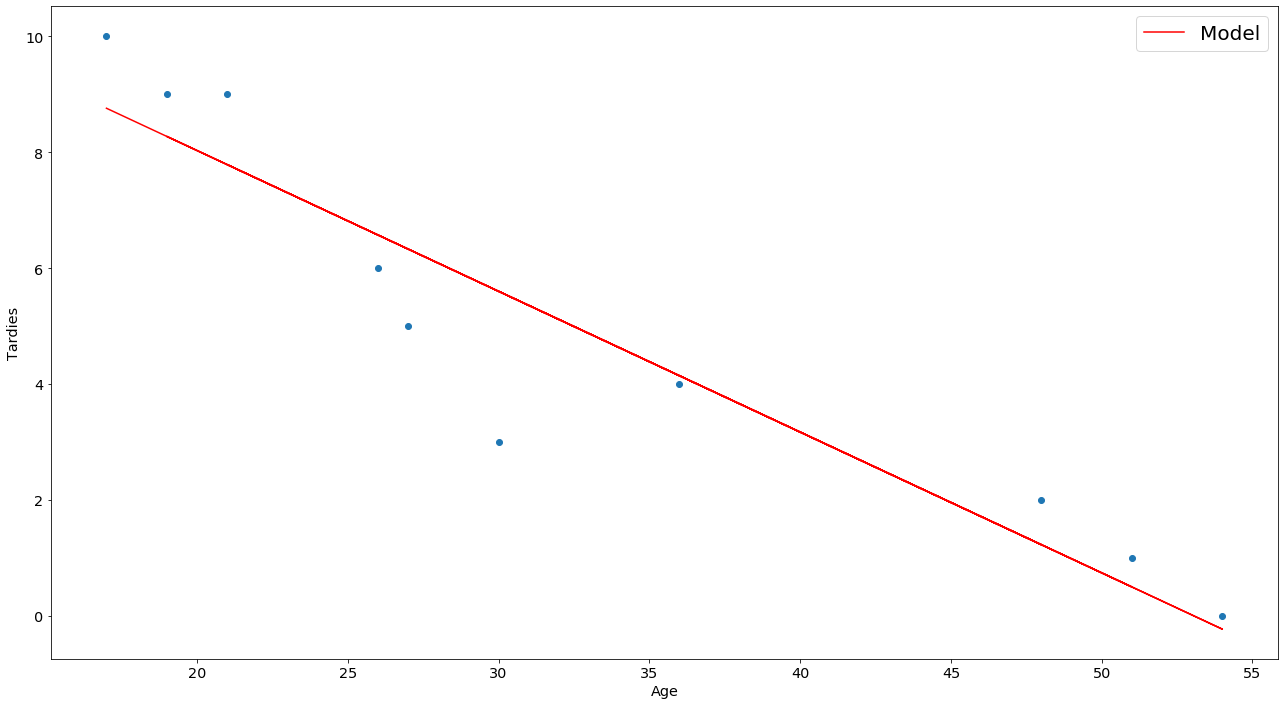

In [48]:
# Your code here.
plt.scatter(student_data.Age, student_data.Tardies)
plt.plot(student_data.Age, predictions, 'r', label='Model')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [49]:
# Your response here. 
# The model shows that a linear fit is a good estimator for the relationship between Age and Tardies.
# Both the correlation coefficient and the model shows that age is a strong indicator of tardies. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [89]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('Vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [52]:
# Your response here. 
vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [53]:
# Your response here. 
# The most important variable for the CO2 emissions is Fuel Barrels/Year
# The least important variable for the CO2 emissions is Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [90]:
X = sm.add_constant(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']])
Y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                             12:06:16   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

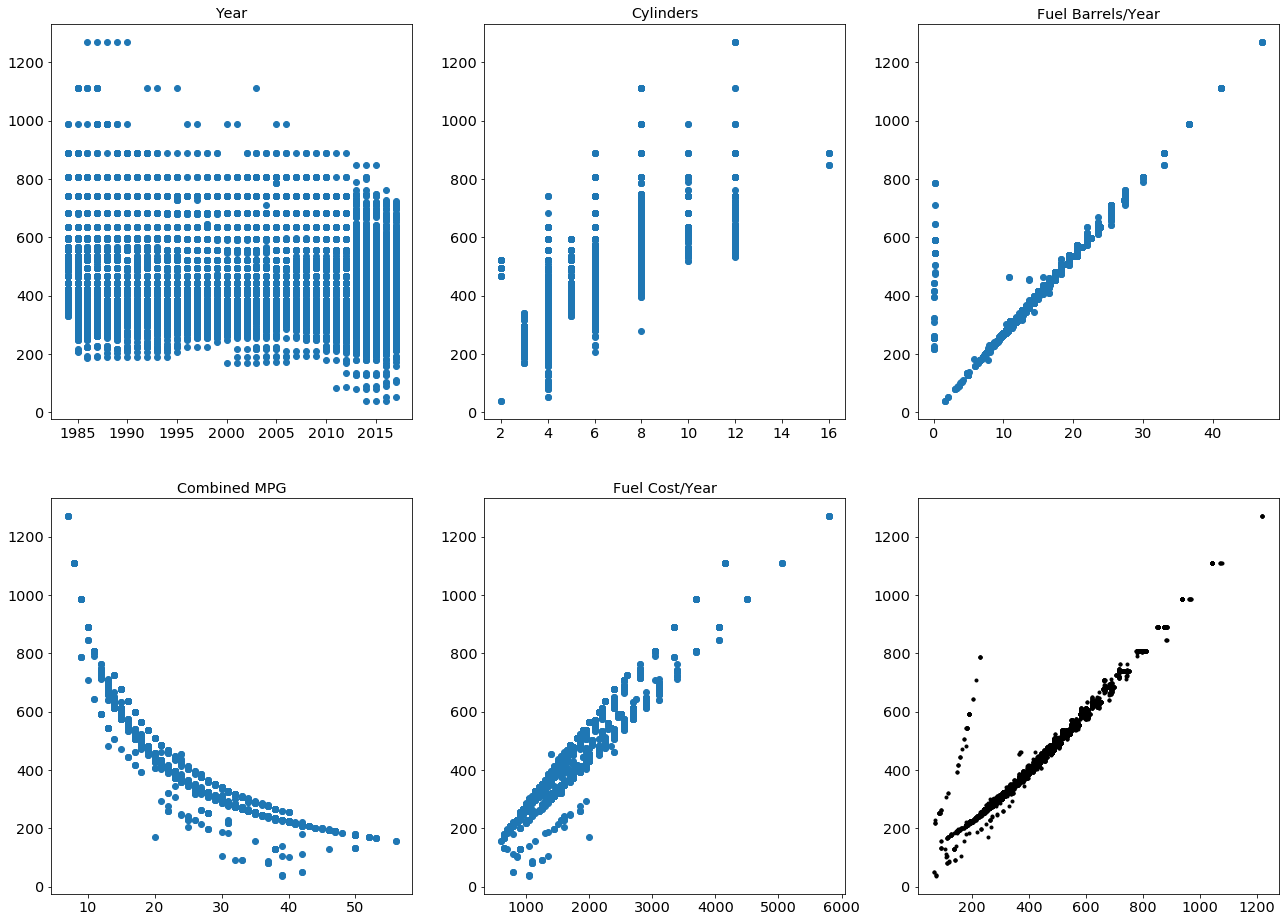

In [83]:
# Your response here. 

# The variables most correlated to CO2 emissions are Fuer Barrel/Year and Fuel Cost/Year because they show a strong linear 
# relation.

fig, axes = plt.subplots(2,3, figsize=(22,16))

axes[0][0].scatter(vehicles['Year'], vehicles['CO2 Emission Grams/Mile'])
axes[0][0].set_title('Year')
axes[0][1].scatter(vehicles['Cylinders'], vehicles['CO2 Emission Grams/Mile'])
axes[0][1].set_title('Cylinders')
axes[0][2].scatter(vehicles['Fuel Barrels/Year'], vehicles['CO2 Emission Grams/Mile'])
axes[0][2].set_title('Fuel Barrels/Year')
axes[1][0].scatter(vehicles['Combined MPG'], vehicles['CO2 Emission Grams/Mile'])
axes[1][0].set_title('Combined MPG')
axes[1][1].scatter(vehicles['Fuel Cost/Year'], vehicles['CO2 Emission Grams/Mile'])
axes[1][1].set_title('Fuel Cost/Year')
axes[1][2].plot(predictions, vehicles['CO2 Emission Grams/Mile'],'k.');

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [63]:
# Your code here. 
party = pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [65]:
# Your code here.
X = sm.add_constant(party.X)
Y = party.Y

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           0.000102
Time:                        11:08:35   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\XHOAN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\XHOAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


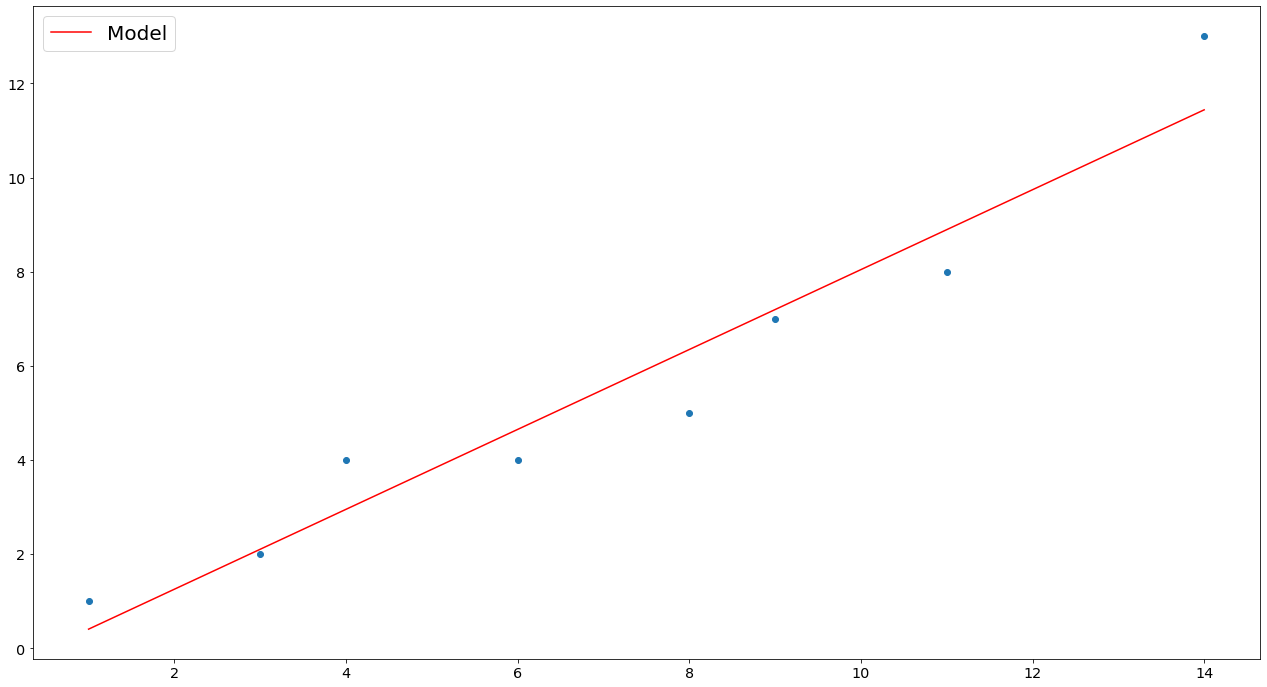

In [69]:
plt.scatter(party.X, party.Y)
plt.plot(party.X, predictions, 'r',label='Model')
plt.legend();

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [70]:
# Your response here. 
# The plot tells that there is a strong relationship between the variables.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [73]:
# Your response here. 
X = sm.add_constant(party.X[:-1])
Y = party.Y[:-1]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           0.000264
Time:                        11:15:59   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

C:\Users\XHOAN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\XHOAN\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


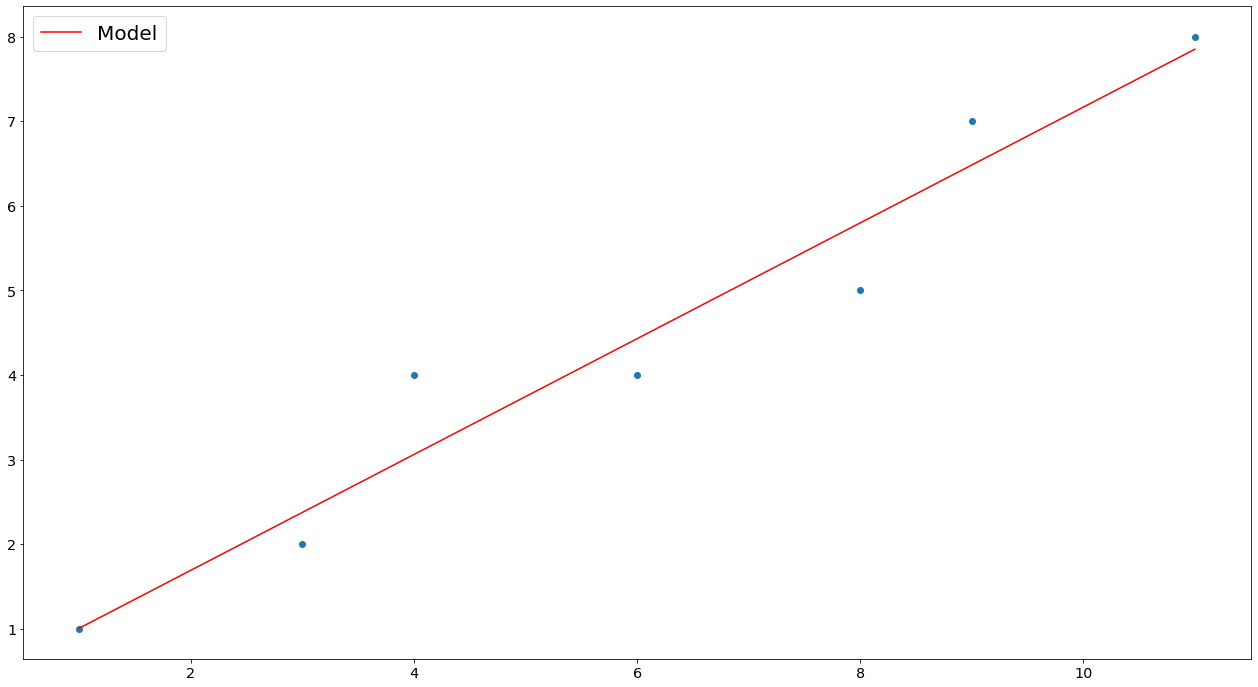

In [75]:
plt.scatter(party.X[:-1], party.Y[:-1])
plt.plot(party.X[:-1], predictions, 'r',label='Model')
plt.legend();

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [76]:
# Your response here. 
# There is a slightly better fit between the data and the model, however such improvement is not significant. 